# [TEMPLATE] DATASET DEPURADO

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [72]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

# Heatmap: Precio segun lat y lng

- **Categoria:** `lat` y `lng`.
- **Objetivo:** Investigar la distribución del precio en función de la latitud y longitud.

In [73]:
df = df.dropna(subset=['lat', 'lng'])[['lat', 'lng', 'precio']]

In [74]:
df.head()

,lat,lng,precio
1,19.310205,-99.227655,3600000
3,19.301890,-99.688015,650000
5,19.300612,-99.148475,1100000
6,17.143504,-96.803504,1150000
7,20.672612,-87.037968,4200000


In [75]:
df.shape

(116512, 3)

Para ver cuales son los datos que tienen sentido, buscaremos un mapa para ver las latitudes y longitudes maximas y minimas que corresponden a Mexico:


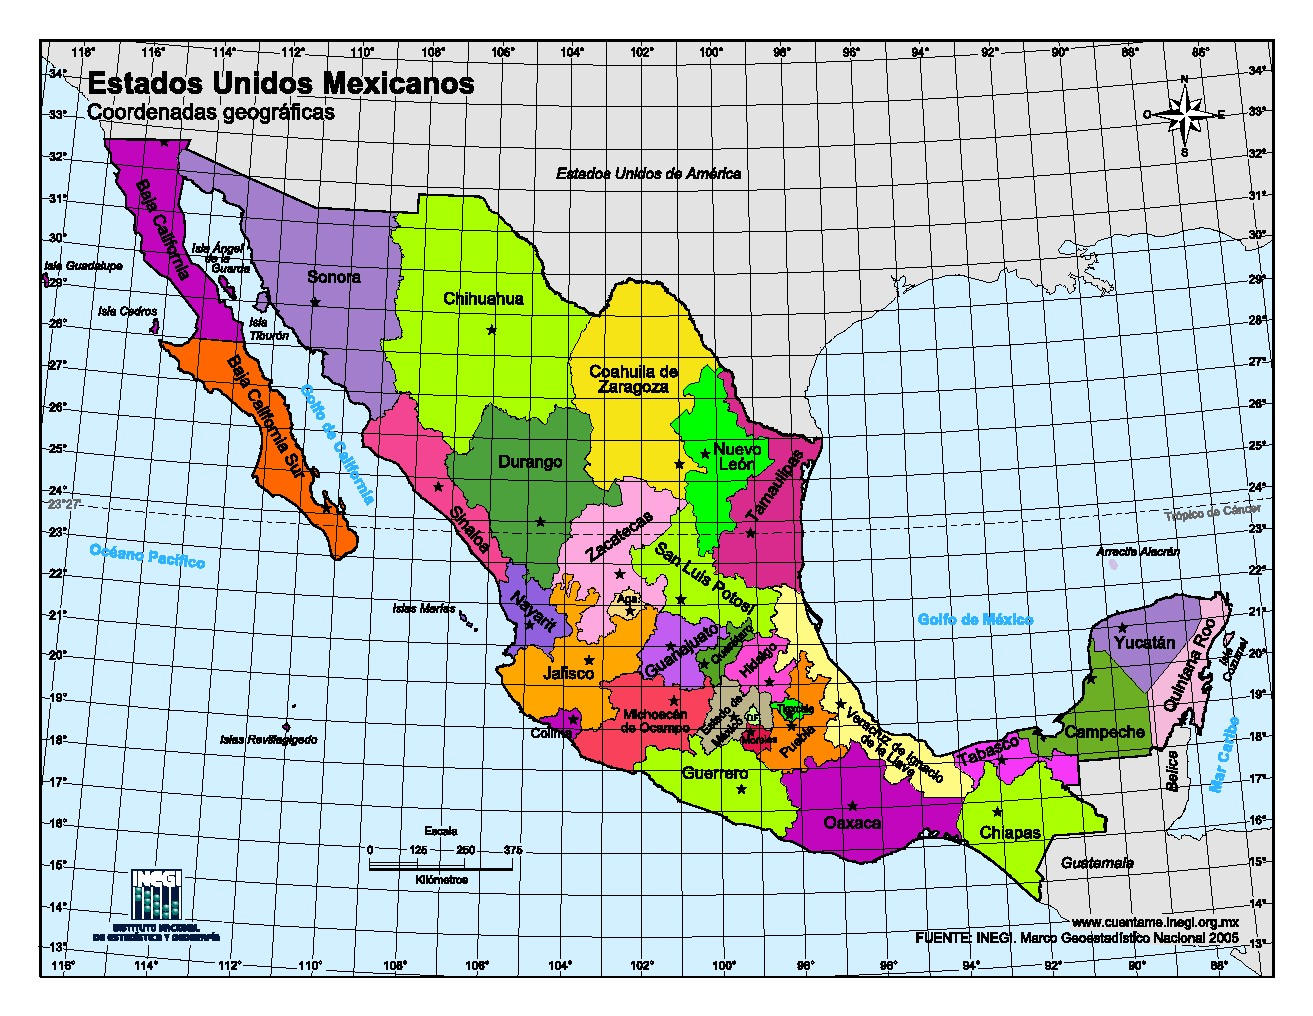

In [76]:
from IPython.display import Image
Image("./data/mapa-mexico-coordenadas-geograficas.jpg")

Podemos ver aquí que la latitud va en un rango desde 14° aproximadamente hasta los 33° como maximo, mientras
que la longitud va entre 85° y 117° aproximadamente.
Vamos a filtrar entonces los datos que tengan sentido:

In [77]:
df = df.loc[((df['lat'] <= 33) & (df['lat'] >= 14)) & ((df['lng'] >= -117) & (df['lng'] <= -85))]

In [78]:
df.shape

(115197, 3)

In [79]:
#df.groupby(pd.cut(df['lat'], 20))['precio'].count()

In [80]:
#df.groupby(pd.cut(df['lng'], 20))['precio'].count()

Ahora podemos generar un heatmap para representar la informacion de los precios por latitud y longitud.

In [81]:
df.head()

,lat,lng,precio
1,19.310205,-99.227655,3600000
3,19.301890,-99.688015,650000
5,19.300612,-99.148475,1100000
6,17.143504,-96.803504,1150000
7,20.672612,-87.037968,4200000


In [82]:
df =df.applymap(lambda x: round(x))

In [83]:
df = df.groupby(['lat', 'lng'])['precio'].agg(['mean', 'count']).astype({'mean':'uint32'})

In [84]:
# Para evitar outliers que nos arruinen la escala del grafico, en cuanto a los cuadrantes que tengan un
# precio promedio alto, nos quedaremos solo con los que tengan al menos 5 publicaciones.

In [86]:
df = df.loc[~((df['count'] <= 5) & (df['mean'] >= 2000000))][['mean']]

In [87]:
df = df.unstack().sort_index(ascending=False).sort_index(axis=1).fillna(0).applymap(lambda x: int(x))

In [88]:
df.columns = df.columns.get_level_values(1)

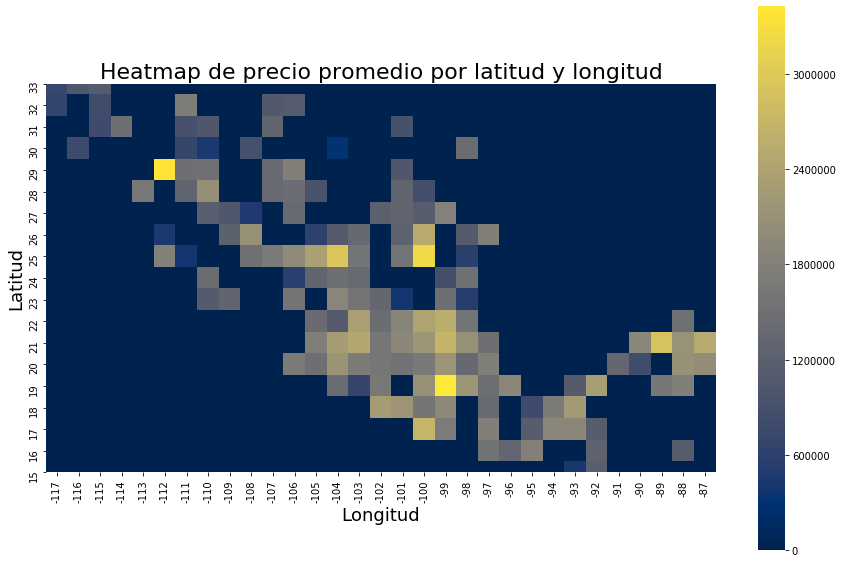

In [90]:
plt.figure(figsize=(15,10))
g = sns.heatmap(df, square=True, cmap='cividis') # linewidths=.5
g.set_title("Heatmap de precio promedio por latitud y longitud", fontsize=22)
g.set_xlabel("Longitud",fontsize=18)
g.set_ylabel("Latitud", fontsize=18)

g.figure.savefig("heatmap precio lat lng.png", transparent=True, bbox_inches='tight')
g.figure.savefig("heatmap precio lat lng.jpg", bbox_inches='tight')